##Assignment 1: <font color='3C6E71'></font>


####Total Points: 5 points)
\

----
**Objective:**

In this assignment, you will choose a challenging dataset about univeristy students from Kaggle and conduct a detailed analysis using Python libraries: Pandas, NumPy, and Matplotlib.

----

**Instructions:**

  **Dataset Selection:**

Choose a dataset about university students that involves multiple variables and requires advanced analytical techniques.

**Data Cleaning and Preparation:**

Perform thorough data cleaning, including handling missing values, outliers, and data type conversions.
Provide a summary of the cleaning process and the rationale behind each step.

**Exploratory Data Analysis (EDA):**

Use NumPy and Pandas to perform detailed exploratory data analysis.
Calculate descriptive statistics and identify key relationships and trends within the data.

**Advanced Data Manipulation:**

Utilize advanced Pandas techniques such as groupby, pivot tables, and merging datasets to uncover deeper insights.
Analyze correlations and provide a detailed interpretation of the findings.

**Data Visualization:**

Create at least five complex visualizations using Matplotlib that effectively communicate the key findings from your analysis (the vizualizations must be logically created).
Include visualizations such as scatter plots, histograms, box plots, and heatmaps.

**Comment:**

Comment your code


In [197]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# Load the dataset
students_data = pd.read_csv('Students-data.csv')

# Preview the first few rows
students_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [201]:
# Check for missing values
students_data.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [203]:
# Checking and ensuring numerical columns have correct data types
students_data['Apps'] = pd.to_numeric(students_data['Apps'], errors='coerce')
students_data['Accept'] = pd.to_numeric(students_data['Accept'], errors='coerce')
students_data['Enroll'] = pd.to_numeric(students_data['Enroll'], errors='coerce')
students_data['Top10perc'] = pd.to_numeric(students_data['Top10perc'], errors='coerce')
students_data['Top25perc'] = pd.to_numeric(students_data['Top25perc'], errors='coerce')

students_data[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc']].head(20)

,Apps,Accept,Enroll,Top10perc,Top25perc
0,1660,1232,721,23,52
1,2186,1924,512,16,29
2,1428,1097,336,22,50
3,417,349,137,60,89
4,193,146,55,16,44
5,587,479,158,38,62
6,353,340,103,17,45
7,1899,1720,489,37,68
8,1038,839,227,30,63
9,582,498,172,21,44


In [170]:
# Step 2: Handling Outliers (Outliers in costs like tuition, room and board)
Q1_outstate = students_data['Outstate'].quantile(0.25)
Q3_outstate = students_data['Outstate'].quantile(0.75)
IQR_outstate = Q3_outstate - Q1_outstate  # Interquartile Range for 'Outstate'

lower_bound_outstate = Q1_outstate - 1.5 * IQR_outstate
upper_bound_outstate = Q3_outstate + 1.5 * IQR_outstate

# Detect outliers in 'Outstate'
outstate_outliers = students_data[(students_data['Outstate'] < lower_bound_outstate) | (students_data['Outstate'] > upper_bound_outstate)]
outstate_outliers

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
47,Bennington College,Yes,519,327,114,25,53,457,2,21700,4100,600,500,35,59,10.1,33,16364,55


In [172]:
Q1_room = students_data['Room.Board'].quantile(0.25)
Q3_room = students_data['Room.Board'].quantile(0.75)
IQR_room = Q3_room - Q1_room

lower_bound_room = Q1_room - 1.5 * IQR_room
upper_bound_room = Q3_room + 1.5 * IQR_room

room_board_outliers = students_data[(students_data['Room.Board'] < lower_bound_room) | (students_data['Room.Board'] > upper_bound_room)]
room_board_outliers

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
37,Barnard College,Yes,2496,1402,531,53,95,2121,69,17926,8124,600,850,83,93,10.3,33,12580,91
346,Mary Baldwin College,Yes,499,441,199,26,52,846,377,11200,7400,600,1300,66,79,6.8,50,10819,90
407,New York University,Yes,13594,7244,2505,70,86,12408,2814,17748,7262,450,1000,87,98,7.8,16,21227,71
414,North Central College,Yes,1127,884,308,30,64,1310,766,11718,7398,450,1800,73,87,16.4,33,8871,76
418,Northeastern University,Yes,11901,8492,2517,16,42,11160,10221,13380,7425,600,1750,73,82,12.9,17,9563,46
515,Scripps College,Yes,855,632,139,60,83,569,7,17238,7350,600,800,95,100,8.2,41,18372,73
663,University of Pennsylvania,Yes,12394,5232,2464,85,100,9205,531,17020,7270,500,1544,95,96,6.3,38,25765,93


In [178]:
# Descriptive statistics
print(round(students_data.describe(), 2))

           Apps    Accept   Enroll  Top10perc  Top25perc  F.Undergrad  \
count    777.00    777.00   777.00     777.00      777.0       777.00   
mean    3001.64   2018.80   779.97      27.56       55.8      3699.91   
std     3870.20   2451.11   929.18      17.64       19.8      4850.42   
min       81.00     72.00    35.00       1.00        9.0       139.00   
25%      776.00    604.00   242.00      15.00       41.0       992.00   
50%     1558.00   1110.00   434.00      23.00       54.0      1707.00   
75%     3624.00   2424.00   902.00      35.00       69.0      4005.00   
max    48094.00  26330.00  6392.00      96.00      100.0     31643.00   

       P.Undergrad  Outstate  Room.Board    Books  Personal     PhD  Terminal  \
count       777.00    777.00      777.00   777.00    777.00  777.00    777.00   
mean        855.30  10440.67     4357.53   549.38   1340.64   72.66     79.70   
std        1522.43   4023.02     1096.70   165.11    677.07   16.33     14.72   
min           1.00

In [278]:
# Grouping data by Private/Public institutions and calculating average graduation rate and expenditure
group_data = students_data.groupby('Private').agg({
    'Grad.Rate': 'mean',
    'Expend' : 'mean'
})
group_data

,Grad.Rate,Expend
Private,,
No,56.042453,7458.316038
Yes,68.998230,10486.353982


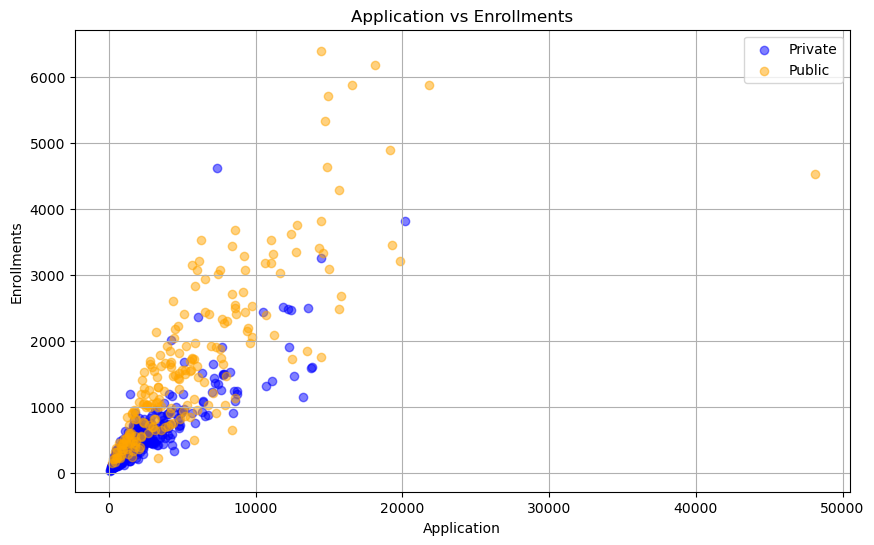

In [282]:
# Scatter Plot: Applications vs Enrollments with Private/Public
plt.figure(figsize=(10, 6))
for category, color in zip(['Yes', 'No'], ['blue', 'orange']):
    subset = students_data[students_data['Private'] == category]
    plt.scatter(subset['Apps'], subset['Enroll'], alpha=0.5, label=f'{"Private" if category == 'Yes' else "Public"}', color=color)

plt.title('Application vs Enrollments')
plt.xlabel('Application')
plt.ylabel('Enrollments')
plt.legend()
plt.grid(True)
plt.show()

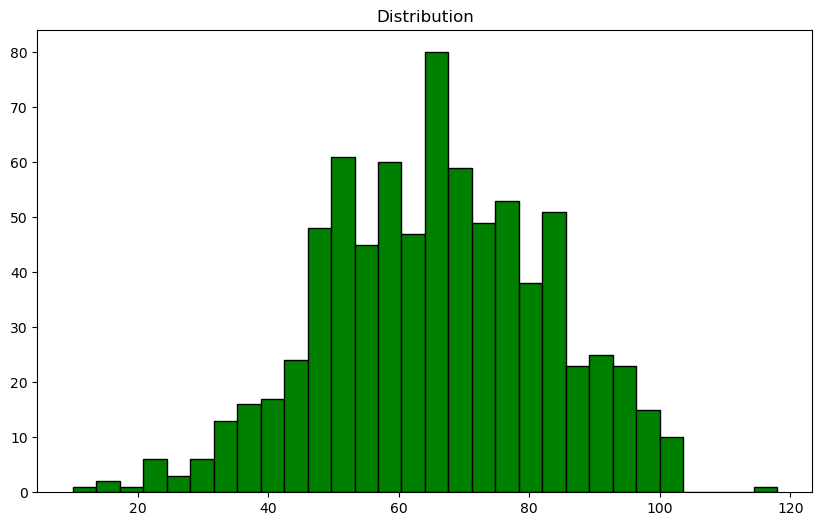

In [288]:
plt.figure(figsize=(10, 6))
plt.hist(students_data['Grad.Rate'], bins=30, color='green', edgecolor='black')
plt.title('Distribution')
plt.show()


<Figure size 1000x600 with 0 Axes>

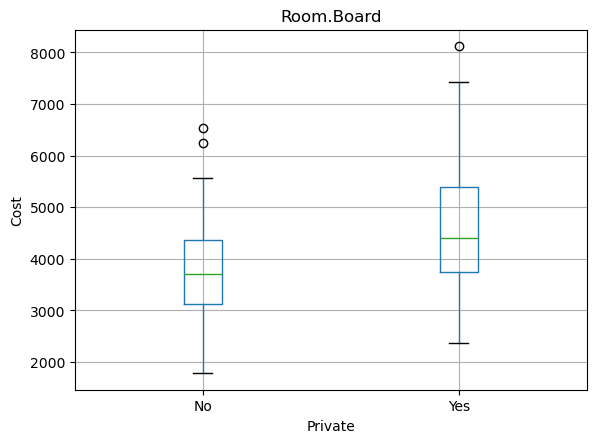

In [266]:
# Box Plot: Room and Board cost by Private/Public institution
plt.figure(figsize=(10, 6))
students_data.boxplot(column='Room.Board', by='Private')
plt.suptitle('')
plt.ylabel('Cost')
plt.show()